In [ ]:
import pandas as pd
import numpy as np

#LOAD DATA
file_path = "combined_uncleansed_dataset.xlsx"  # Upload this file in Colab manually
combined = pd.read_excel(file_path)

# Display original data sample
print("\n=== BEFORE PREPROCESSING ===")
display(combined.head())


=== BEFORE PREPROCESSING ===


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [ ]:
#DROP HIGHLY MISSING COLUMNS (>90%)
drop_cols = ['PoolQC', 'MiscFeature', 'Alley']
combined.drop(columns=drop_cols, inplace=True)

In [ ]:
#HANDLE MISSING VALUES
combined['LotFrontage'] = combined.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
combined['MasVnrType'].fillna('None', inplace=True)
combined['MasVnrArea'].fillna(0, inplace=True)
combined['BsmtQual'].fillna('None', inplace=True)
combined['BsmtCond'].fillna('None', inplace=True)
combined['BsmtExposure'].fillna('None', inplace=True)
combined['BsmtFinType1'].fillna('None', inplace=True)
combined['BsmtFinType2'].fillna('None', inplace=True)
combined['Electrical'].fillna(combined['Electrical'].mode()[0], inplace=True)
combined['FireplaceQu'].fillna('None', inplace=True)
combined['GarageType'].fillna('None', inplace=True)
combined['GarageYrBlt'].fillna(0, inplace=True)
combined['GarageFinish'].fillna('None', inplace=True)
combined['GarageQual'].fillna('None', inplace=True)
combined['GarageCond'].fillna('None', inplace=True)
combined['Fence'].fillna('None', inplace=True)

<ipython-input-3-9ba545238c7a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['MasVnrType'].fillna('None', inplace=True)
<ipython-input-3-9ba545238c7a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
#ENCODE ORDINAL FEATURES
ordinal_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'HeatingQC', 'KitchenQual', 'FireplaceQu',
                    'GarageQual', 'GarageCond']
for feature in ordinal_features:
    combined[feature] = combined[feature].map(ordinal_map)

bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
bsmt_finish_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
combined['BsmtExposure'] = combined['BsmtExposure'].map(bsmt_exposure_map)
combined['BsmtFinType1'] = combined['BsmtFinType1'].map(bsmt_finish_map)
combined['BsmtFinType2'] = combined['BsmtFinType2'].map(bsmt_finish_map)

garage_finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
combined['GarageFinish'] = combined['GarageFinish'].map(garage_finish_map)


In [ ]:
#FEATURE ENGINEERING
combined['TotalSF'] = combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF']
combined['TotalBath'] = combined['FullBath'] + 0.5 * combined['HalfBath'] + combined['BsmtFullBath'] + 0.5 * combined['BsmtHalfBath']
combined['Age'] = combined['YrSold'] - combined['YearBuilt']
combined['RemodAge'] = combined['YrSold'] - combined['YearRemodAdd']

In [ ]:
#ENCODE NOMINAL FEATURES
object_cols = combined.select_dtypes(include='object').columns
combined = pd.get_dummies(combined, columns=object_cols, drop_first=True)

In [ ]:
# SHOW AFTER PREPROCESSING
print("\n=== AFTER PREPROCESSING ===")
display(combined.head())


=== AFTER PREPROCESSING ===


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
#SAVE TO FILE
output_path = "preprocessed_combined_dataset.xlsx"
combined.to_excel(output_path, index=False)
print("\nPreprocessed dataset saved as:", output_path)


Preprocessed dataset saved as: preprocessed_combined_dataset.xlsx


In [ ]:
# XGBoost Training with Full Preprocessed Data, Feature Selection, and Visualization

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load your preprocessed data
combined = pd.read_excel("preprocessed_combined_dataset.xlsx")
train = combined[~combined['SalePrice'].isnull()].copy()


In [ ]:
# Separate train and test
train = combined[~combined['SalePrice'].isnull()].copy()
test = combined[combined['SalePrice'].isnull()].copy()

In [ ]:
# Split features and target
X = train.drop(columns=['Id', 'SalePrice'])
y = train['SalePrice']


In [ ]:

# STEP 4: Train-test split (80/20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Save full (unfiltered) splits
train_split = X_train.copy()
train_split['SalePrice'] = y_train
valid_split = X_valid.copy()
valid_split['SalePrice'] = y_valid
train_split.to_excel("train_80_split.xlsx", index=False)
valid_split.to_excel("validation_20_split.xlsx", index=False)
print("Train and validation datasets saved as train_80_split.xlsx and validation_20_split.xlsx")

Train and validation datasets saved as train_80_split.xlsx and validation_20_split.xlsx


In [ ]:
# Initial XGBoost model for feature selection
model_initial = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_initial.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

<Figure size 1200x600 with 0 Axes>

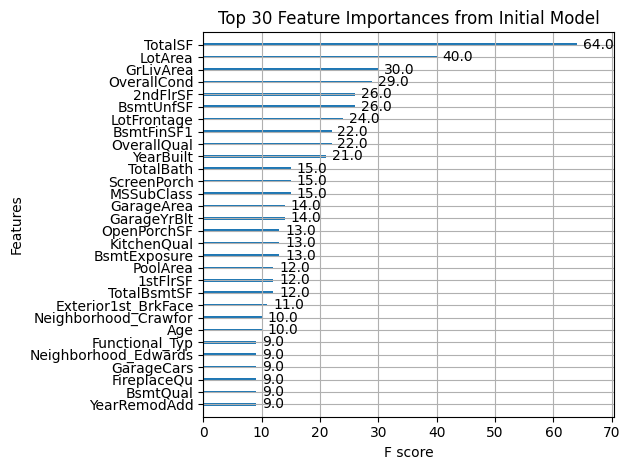

In [ ]:
# Visualize initial feature importances
plt.figure(figsize=(12, 6))
plot_importance(model_initial, max_num_features=30)
plt.title("Top 30 Feature Importances from Initial Model")
plt.tight_layout()
plt.show()

In [ ]:
# More aggressive feature selection
selector = SelectFromModel(model_initial, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_valid_selected = selector.transform(X_valid)

# Save selected columns
selected_feature_names = X_train.columns[selector.get_support()]
print("Original feature count:", X_train.shape[1])
print("Selected feature count:", X_train_selected.shape[1])
print("Selected features:", selected_feature_names.tolist())

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_valid_selected_df = pd.DataFrame(X_valid_selected, columns=selected_feature_names)
X_train_selected_df['SalePrice'] = y_train.values
X_valid_selected_df['SalePrice'] = y_valid.values
X_train_selected_df.to_excel("train_selected_80_split.xlsx", index=False)
X_valid_selected_df.to_excel("validation_selected_20_split.xlsx", index=False)
print("Selected feature datasets saved as train_selected_80_split.xlsx and validation_selected_20_split.xlsx")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original feature count: 212
Selected feature count: 28
Selected features: ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'OpenPorchSF', 'TotalSF', 'TotalBath', 'Age', 'RemodAge', 'MSZoning_RM', 'Neighborhood_Edwards', 'Exterior1st_Stucco', 'CentralAir_Y', 'GarageType_Attchd', 'SaleType_New']
Selected feature datasets saved as train_selected_80_split.xlsx and validation_selected_20_split.xlsx


In [ ]:
# Evaluate the initial model (before feature selection)
y_pred_initial = model_initial.predict(X_valid)
mae_initial = mean_absolute_error(y_valid, y_pred_initial)
mse_initial = mean_squared_error(y_valid, y_pred_initial)
rmse_initial = np.sqrt(mse_initial)
r2_initial = r2_score(y_valid, y_pred_initial)

print("\nInitial Model (Before Feature Selection):")
print(f"MAE: {mae_initial:.2f}")
print(f"MSE: {mse_initial:.2f}")
print(f"RMSE: {rmse_initial:.2f}")
print(f"R²: {r2_initial:.4f}")


Initial Model (Before Feature Selection):
MAE: 16085.89
MSE: 687700536.68
RMSE: 26224.05
R²: 0.9103


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',  # ← now optimizing for highest R²
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_selected, y_train)
print("Best parameters based on R²:", grid_search.best_params_)
best_model = grid_search.best_estimator_



Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters based on R²: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [ ]:
# Evaluate best model
y_pred = best_model.predict(X_valid_selected)
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"\nFinal Tuned Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")



Final Tuned Model Performance:
MAE: 16820.71
RMSE: 26544.83
R²: 0.9081


In [ ]:
# Train final model on selected features
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, reg_alpha=0.1, reg_lambda=1.0, random_state=42)
model.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate final model
y_pred = model.predict(X_valid_selected)
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"\nFinal Model (After Feature Selection):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Final Model (After Feature Selection):
MAE: 16945.41
MSE: 677593155.09
RMSE: 26030.62
R²: 0.9117


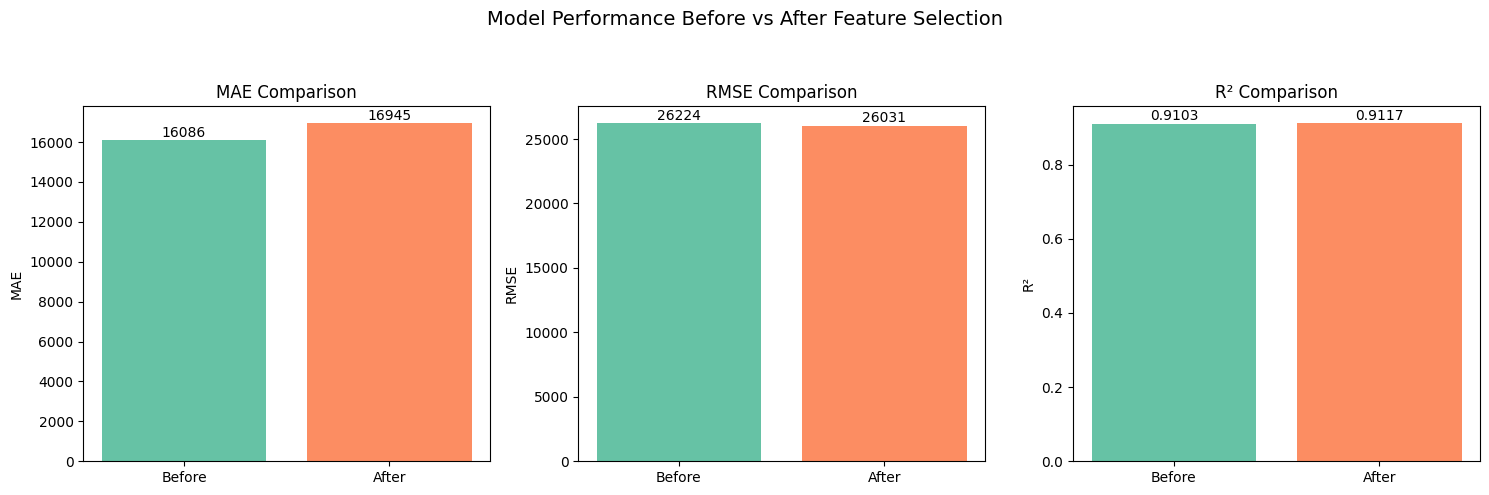

In [ ]:
# Compare performance before vs after feature selection
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['MAE', 'RMSE', 'R²']
before = [mae_initial, rmse_initial, r2_initial]
after = [mae, rmse, r2]
colors = ['#66c2a5', '#fc8d62']

for i, metric in enumerate(metrics):
    ax[i].bar(['Before', 'After'], [before[i], after[i]], color=colors)
    ax[i].set_title(f"{metric} Comparison")
    ax[i].set_ylabel(metric)
    for j, val in enumerate([before[i], after[i]]):
        ax[i].text(j, val + (0.01 * val), f"{val:.4f}" if metric == 'R²' else f"{val:.0f}", ha='center')

plt.suptitle("Model Performance Before vs After Feature Selection", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


<Figure size 1200x600 with 0 Axes>

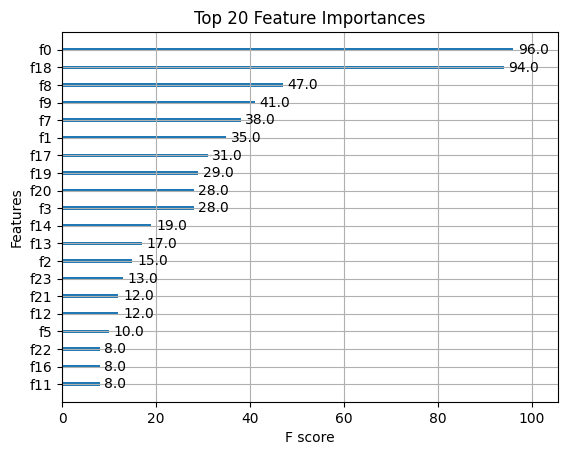

In [ ]:
# Feature importance
plt.figure(figsize=(12, 6))
plot_importance(model, max_num_features=20)
plt.title("Top 20 Feature Importances")
plt.show()

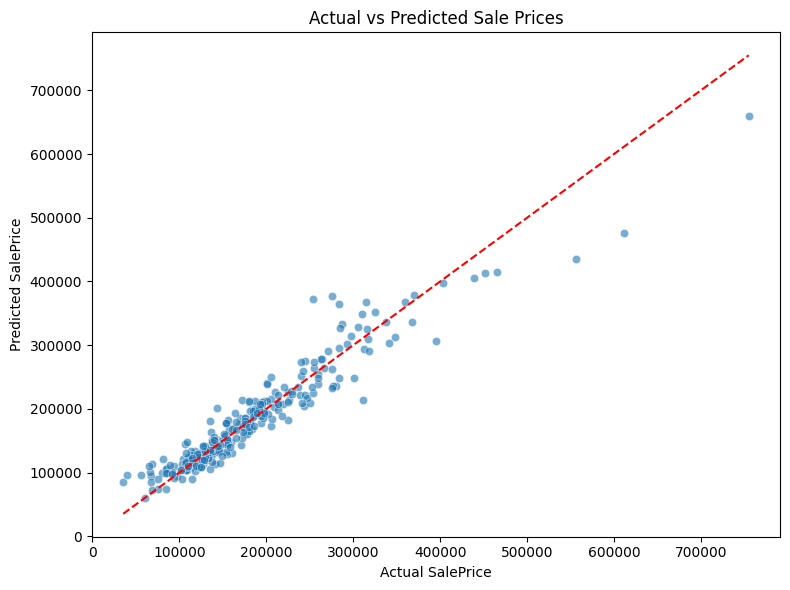

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_valid, y=y_pred, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--r')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.tight_layout()
plt.show()

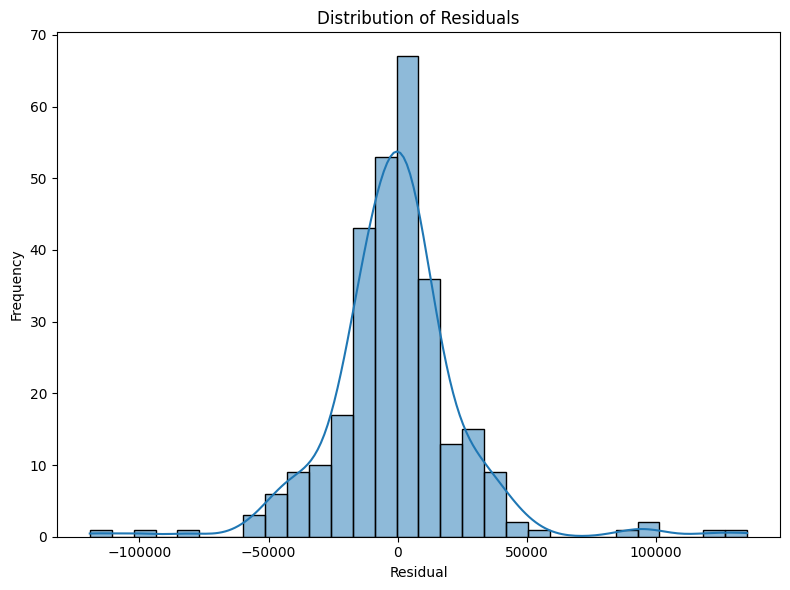

In [ ]:
# Residuals plot
residuals = y_valid - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


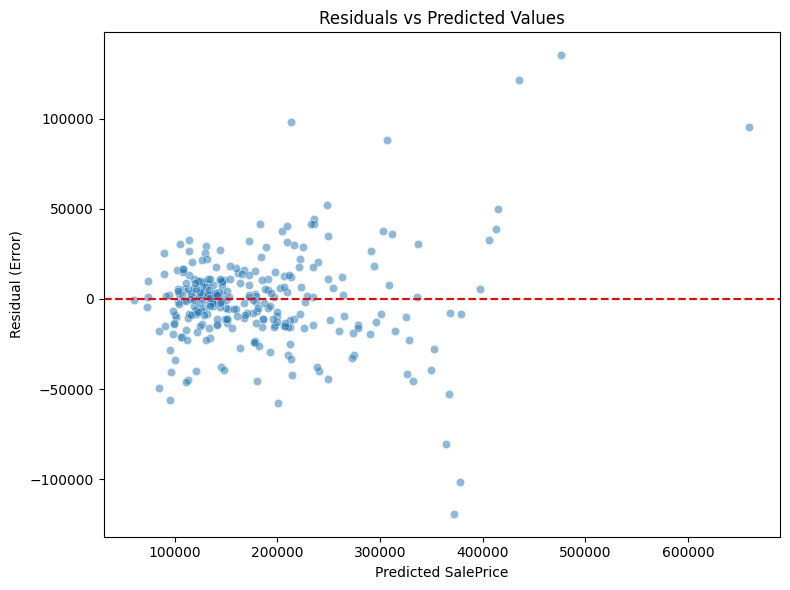

In [ ]:
# Residuals vs Prediction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

In [ ]:
# Predict on real test set (with selected features)
X_test = test.drop(columns=['Id', 'SalePrice'])
X_test_selected = selector.transform(X_test)
y_test_pred = model.predict(X_test_selected)
submission = pd.DataFrame({"Id": test['Id'], "SalePrice": y_test_pred})
submission.to_csv("submission_xgboost.csv", index=False)
print("Submission file saved as: submission_xgboost.csv")

Submission file saved as: submission_xgboost.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Save model
joblib.dump(model, "xgb_model.pkl")
print("Model saved as xgb_model.pkl")

Model saved as xgb_model.pkl


In [ ]:
# Download model (Colab)
from google.colab import files
files.download("xgb_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>